We have seen a lot of great tools so far for data mining.  Today, we are going to get into a great tool for working with graphs called [networkx](https://networkx.org/).  Lets start our environment

    conda activate csci347

and add networkx to our environment

    conda install networkx
    
And to make sure that you are versioning your environemtn

    conda env export > environment.yml

Now let's get to it!  We will start by importing networkx


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

Now, let's do some simple operations like creating a graph and looking at some descriptive statistics.  First, let's create an undirected graph:

In [2]:
G = nx.Graph()

And then add some edges:

In [3]:
G.add_edge('A', 'B')
G.add_edge('A', 'C')
G.add_edge('A', 'E')
G.add_edge('B', 'C')
G.add_edge('B', 'D')
G.add_edge('C', 'E')
G.add_edge('D', 'E')

And let's visualize this graph:

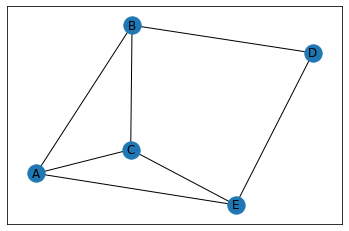

In [4]:
nx.draw_networkx(G)

Note that graphx is intended for graph analysis and not graph visualiztion.  There is some discussion of removing viz from graphx and moving it to an add-on.  Graph drawing is complex (I cover some basics in my grad comp geom course), so if you need sophisticated viz, I recommend using a dedicated graph viz tool like [pygraphviz](https://pygraphviz.github.io/)

Great!  Now let's get some descriptive stats on the graph.

In [5]:
nx.info(G)

'Graph with 5 nodes and 7 edges'

For most of our analysis, we turned our graph into an adjacency matrix.  So as you would expect, there is a function to do that for us:

In [6]:
A = nx.adjacency_matrix(G)

Let's look at some props about the matrix

In [7]:
A

<5x5 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

And the actual content of the matrix

In [8]:
print(A)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (1, 4)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (3, 0)	1
  (3, 2)	1
  (3, 4)	1
  (4, 1)	1
  (4, 3)	1


In [9]:
type(A)

scipy.sparse._csr.csr_matrix

Note that we have a sparse matrix representation from scipy.  Scipy is a great library that was a dependency of a few of the libraries that we have used so far.  While we will not spend much time with scipy, it has lots of great functions for doing scientific computing with python.

A sparse matrix rep is very helpful for some applications and not helpful for others (but sparse is a reasonable default option).  We can make the graph in to a dense matrix:

In [10]:
A.todense()

matrix([[0, 1, 1, 1, 0],
        [1, 0, 1, 0, 1],
        [1, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0]])

Note that since our matrix is undirected, it is symetric.  Let's use some code to verify:

In [11]:
np.all(A.transpose().todense() == A.todense())

True

There is some functionality to get the degree of verts.  For example, let's get the degree of vertex with label 'A' and the degree of all verts

In [12]:
nx.degree(G, 'A')

3

In [13]:
nx.degree(G)

DegreeView({'A': 3, 'B': 3, 'C': 3, 'E': 3, 'D': 2})

Let's see how to combine a few tool and plot a histogram of the node degrees in the graph.

In [14]:
deg_view = nx.degree(G)
deg_vals = dict(deg_view).values()

Let's break down that previous code block.  We saw that `nx.degree(G)` gives us the degees of each vert, but for a histogram, we need to give a list of values (and then the histogram functins figures out the counts). 
To get just the degrees, first we will take `deg_view` and cast it to a dictonary (e,g. `dict`) with:
    
    dict(deg_view)

In python, a dict has a key-value structur.  But, we don't really care about the key-value mappings, we just want the values. And we are in luck, the dict has a function that just gives us the values (like we need for creating a histogram)  `dict.values()`.   

Putting that all toget, we cast the `deg_view` to a dictionary and then use the `values()` function to just get the value form the dict.

Mow we have the data, let's plot!

Text(0, 0.5, 'number of nodes with degree')

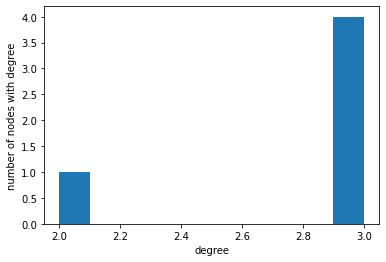

In [15]:
plt.hist(deg_vals)
plt.xlabel('degree')
plt.ylabel('number of nodes with degree')

Next, let's take a look at some of the centrality measures that we learned about.  Let's use a bit more interesting of a graph though.

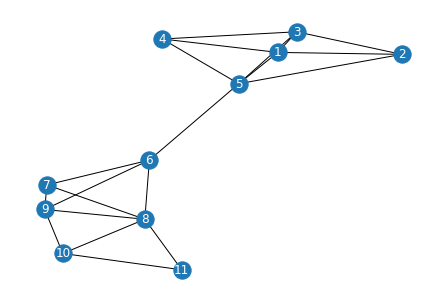

In [16]:
G = nx.Graph()

G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(1,5)
G.add_edge(2,3)
G.add_edge(2,5)
G.add_edge(3,4)
G.add_edge(3,5)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(6,7)
G.add_edge(6,8)
G.add_edge(6,9)
G.add_edge(7,8)
G.add_edge(7,9)
G.add_edge(8,9)
G.add_edge(8,10)
G.add_edge(8,11)
G.add_edge(9,10)
G.add_edge(10,11)

nx.draw(G, with_labels=True, font_color="white")

And quickly, let's take a look at the degree histogram

Text(0, 0.5, 'number of nodes with degree')

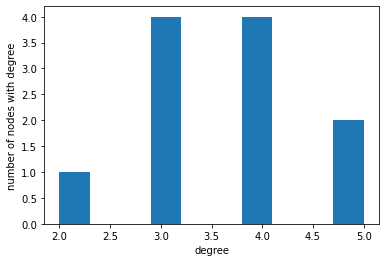

In [17]:
deg_vals = dict(nx.degree(G)).values()
plt.hist(deg_vals)
plt.xlabel('degree')
plt.ylabel('number of nodes with degree')

Great!  Now, let's start off with what we just learned.  Clustering coeff!

In [18]:
nx.clustering(G)

{1: 0.8333333333333334,
 2: 1.0,
 3: 0.8333333333333334,
 4: 1.0,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0.6666666666666666,
 10: 0.6666666666666666,
 11: 1.0}

We also saw that we can use clustering coeff as a global measure of the graph by summing up the clutering coeff of each node.  This is easy to compute:

In [19]:
sum(nx.clustering(G).values()) / G.number_of_nodes()

0.7727272727272727

Recall that if we have a node with degree less than 2, the clustering coeff of that node is 0.  So, let's add a degree 1 node.  I asked Prof Barktreuse what she thinks will happen to the clustering coeff.  She suspects that it will decrease.  Let's test it out:

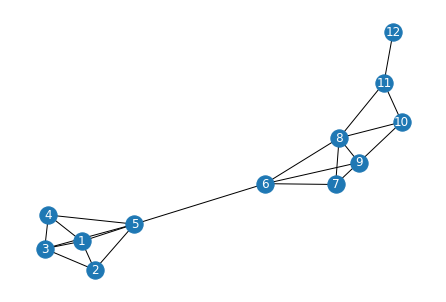

In [20]:
G.add_edge(11,12)
nx.draw(G, with_labels=True, font_color="white")

In [21]:
sum(nx.clustering(G).values()) / G.number_of_nodes()

0.6527777777777778

Yep, indeed, it decreased.  Prof Barktreuse was right again!

NetworkX is also useful for some basic graph algos as well, such as finding lengths of shotest paths:

In [22]:
nx.shortest_path(G, 3, 12)

[3, 5, 6, 8, 11, 12]

In [23]:
nx.shortest_path_length(G, 3, 12)

5

And, we can compute all the versions of centrality that we discussed

In [24]:
nx.betweenness_centrality(G)

{1: 0.00606060606060606,
 2: 0.0,
 3: 0.00606060606060606,
 4: 0.0,
 5: 0.5151515151515151,
 6: 0.5454545454545454,
 7: 0.0,
 8: 0.33636363636363636,
 9: 0.06363636363636363,
 10: 0.01818181818181818,
 11: 0.18181818181818182,
 12: 0.0}

In [25]:
# using definition in the slides
nx.betweenness_centrality(G, normalized=False)

{1: 0.3333333333333333,
 2: 0.0,
 3: 0.3333333333333333,
 4: 0.0,
 5: 28.333333333333332,
 6: 30.0,
 7: 0.0,
 8: 18.5,
 9: 3.5,
 10: 1.0,
 11: 10.0,
 12: 0.0}

In [26]:
# prestige centrality
nx.eigenvector_centrality(G)

{1: 0.36627729862767705,
 2: 0.3035233477790213,
 3: 0.36627729862767705,
 4: 0.3035233477790213,
 5: 0.431979458181741,
 6: 0.3177812857765362,
 7: 0.22846874913067822,
 8: 0.2930703511805845,
 9: 0.2657115575074779,
 10: 0.18013155794042954,
 11: 0.13232570295898796,
 12: 0.03448965282719219}

But, if you want to control how many iterations, you can use the `max_iter` argument. But you will get an error if it fails to converge within that number of iterations.  For example:

In [27]:
try:
    nx.eigenvector_centrality(G, max_iter=10)
except nx.PowerIterationFailedConvergence as e:
    print(e)

(PowerIterationFailedConvergence(...), 'power iteration failed to converge within 10 iterations')


In [28]:
nx.pagerank(G)

{1: 0.08873146737576008,
 2: 0.06867264042660365,
 3: 0.08873146737576008,
 4: 0.06867264042660365,
 5: 0.10860251215801077,
 6: 0.09166115021829115,
 7: 0.07221571015770953,
 8: 0.11864230222515453,
 9: 0.09443787795285574,
 10: 0.07704319008004934,
 11: 0.08578347000332444,
 12: 0.036805571599876734}

Finally, let's read and write some graphs.  The simpleset format for a graph is an edge list, which is just on each line an identifier for the pair of verts that define the edge:

For example, the graph

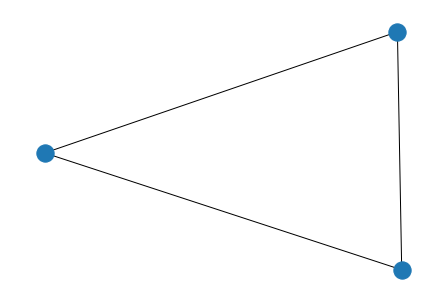

In [29]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,1)
nx.draw(G)

could be written as an edge list
    
    1,2
    2,3
    3,1
    
So, let's create a small file with that info.

In [30]:
f = open('edge_list_example.txt', 'w')
f.write('1,2\n')
f.write('2,3\n')
f.write('3,1\n')
f.close()

And let's look at the file

In [31]:
!cat 'edge_list_example.txt'

1,2
2,3
3,1


Super!  we can read that edgelist in easily with

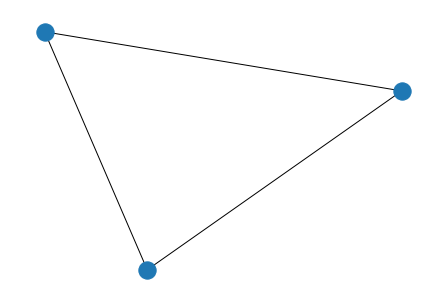

In [32]:
graph_from_file = nx.read_edgelist('edge_list_example.txt', nodetype=int, delimiter=',')
nx.draw(graph_from_file)

We can also generate graphs.  This is very helpful when trying things out.  For example, we can create a complte graph, a path, a cycle.

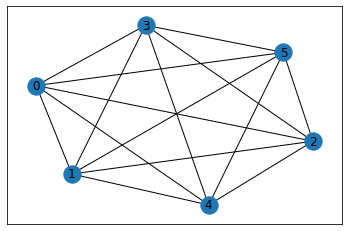

In [36]:
complete = nx.complete_graph(6)
nx.draw_networkx(complete)

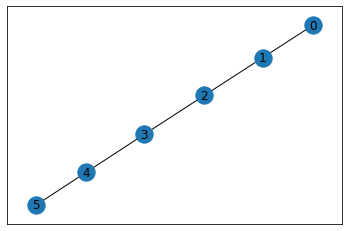

In [38]:
path = nx.path_graph(6)
nx.draw_networkx(path)

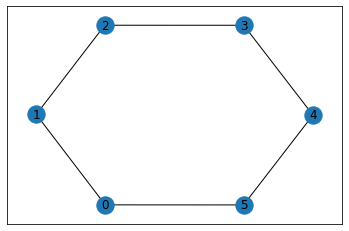

In [39]:
G_cycle = nx.cycle_graph(6)
nx.draw_networkx(G_cycle)

Sometimes, you may have a graph that is too large for development and so you want to sample the graph.  We can get a smaller graph to work with as follows.

To start, let's get a largeish graph.  We will use a random graph model called Barabasi-Albert.  You don't need to know what it is, but it creates graphs with some interesting properties such as "hyper-small world" and "scale free".  You don't need to know what those properties are either, but I encourage you to seach around to find out!

In [50]:
ba = nx.barabasi_albert_graph(n=500, m=15)
nx.info(ba)

'Graph with 500 nodes and 7275 edges'

Let's get a subgraph of the graph with 50 nodes.  First, we will sample the nodes and then take a subgraph with those nodes.

In [56]:
import random
random_nodes = random.sample(list(ba.nodes),50)
ba50 = ba.subgraph(random_nodes)
nx.info(ba50)

'Graph with 50 nodes and 59 edges'

That is not too big, let's look at it

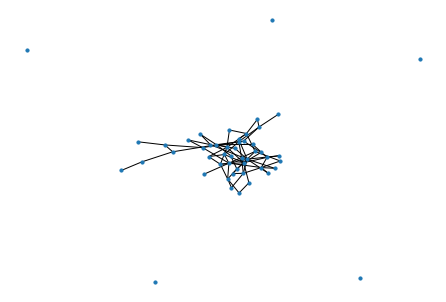

In [57]:
nx.draw(ba100, node_size=10)

Notice that most liklely, we will end up with a few connected components. We may want to take the largest connected component as follows. 

In [60]:
max(nx.connected_components(ba100), key=len)

{7,
 32,
 36,
 51,
 56,
 61,
 75,
 80,
 84,
 96,
 97,
 109,
 155,
 161,
 162,
 174,
 175,
 179,
 187,
 188,
 202,
 224,
 232,
 242,
 246,
 247,
 249,
 259,
 270,
 277,
 291,
 314,
 333,
 336,
 349,
 358,
 394,
 400,
 414,
 433,
 438,
 447,
 477,
 483,
 497}